In [106]:
import pandas as pd
import re
import string
import nltk
nltk . download ('stopwords')
nltk . download ('wordnet')
from nltk . corpus import stopwords
from nltk . stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

import os
from sklearn.tree import export_graphviz

[nltk_data] Downloading package stopwords to /Users/vayne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/vayne/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Preparing

In [107]:
df = pd.read_csv("IMDB-Dataset.csv")
df.head(5)
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


#### Remove douplicate rows

In [108]:
df = df.drop_duplicates()
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [109]:
print(50000 - 49582)

418


### Data Cleaning

In [110]:
import re
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions

# Load stopwords
stop = set(stopwords.words('english'))

def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data
def preprocess_text(text):
    wl = WordNetLemmatizer()
    
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    
    # Expand contractions
    text = expand_contractions(text)
    
    # Remove emojis
    emoji_clean = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)
    
    # Add space after full stop
    text = re.sub(r"\.(?=\S)", '. ', text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove punctuation and lowercase the text
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    
    # Lemmatize and remove stopwords
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])
    
    return text


In [111]:
df = pd.read_csv("IMDB-Dataset.csv")

print(df['review'][0:5])
print('---------'*10)
df['review'] = df['review'].apply(preprocess_text)
print(df['review'][0:5])

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object
------------------------------------------------------------------------------------------


/var/folders/s5/wym0v1rn1t140fz72hjhdv680000gn/T/ipykernel_1129/1771365016.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


0    one reviewer mentioned watching oz episode hoo...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake think zombie ...
4    petter matteis love time money visually stunni...
Name: review, dtype: object


### Analysis and Statistics
* Using Pie Graph to visual or presentation data

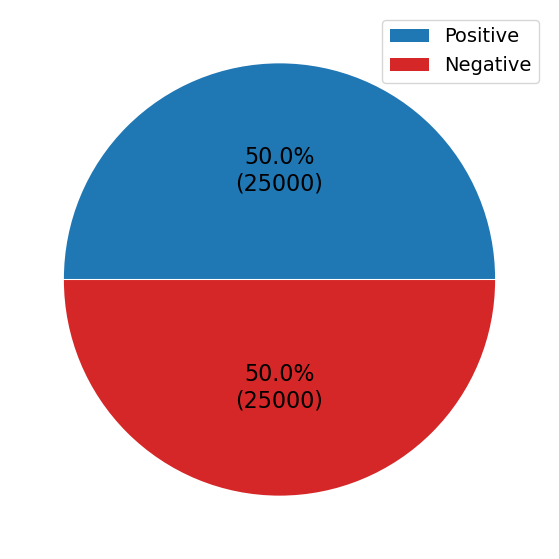

In [112]:
import numpy as np
import seaborn as sns
import matplotlib . pyplot as plt

def func (pct , allvalues ) :
    absolute = int( pct / 100.* np. sum( allvalues ) )
    return "{:.1f}%\n({:d})". format (pct , absolute )

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])
data = [ freq_pos , freq_neg ]
labels = ['positive', 'negative']

# Create pie chart
pie , ax = plt . subplots ( figsize =[11 ,7])
plt.pie(x=data , autopct = lambda pct: func (pct , data ) , explode =[0.0025]*2 ,
    pctdistance =0.5 , colors =[sns. color_palette () [0] ,'tab:red'] , textprops ={'fontsize':16})
# plt . title ( ’ Frequencies of sentiment labels ’, fontsize =14 , fontweight = ’ bold ’)
labels = [r'Positive', r'Negative']
plt . legend (labels , loc ="best", prop ={'size': 14})
pie . savefig ("PieChart .png")
plt . show ()

### Statistic of labels for samples

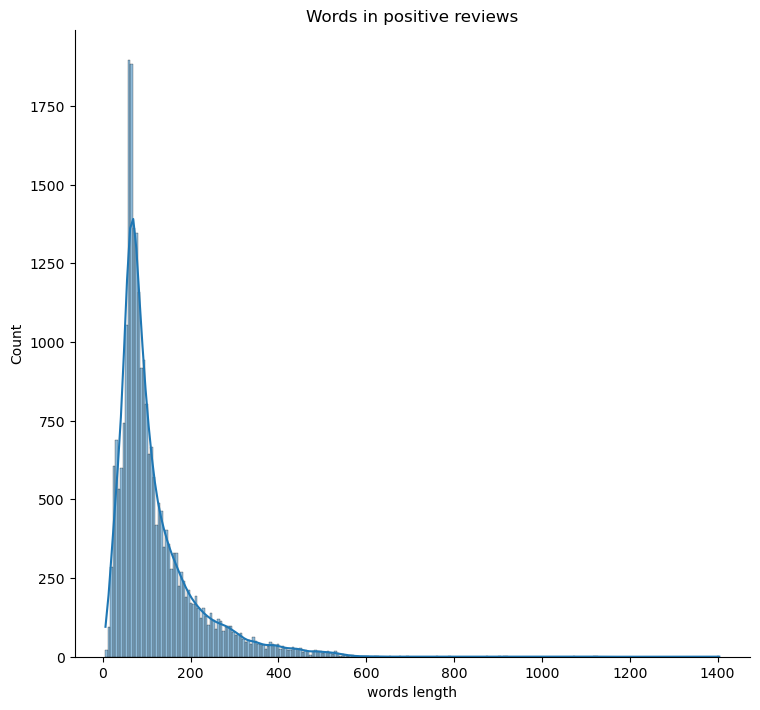

<Figure size 640x480 with 0 Axes>

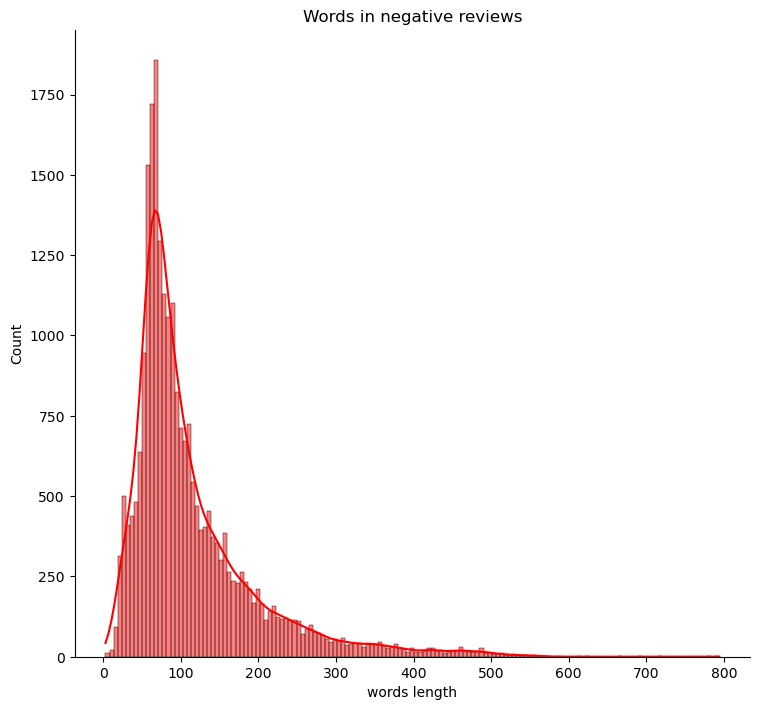

<Figure size 640x480 with 0 Axes>

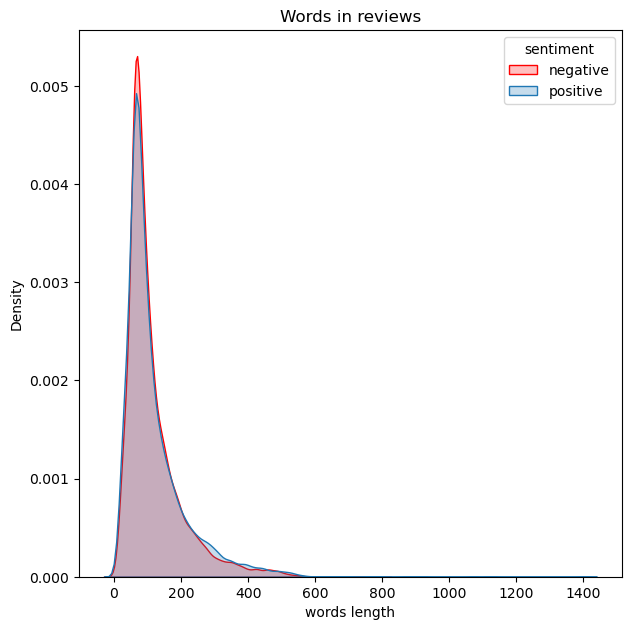

<Figure size 640x480 with 0 Axes>

In [131]:
words_len = df['review']. str . split () . map( lambda x: len(x) )
df_temp = df. copy ()
df_temp ['words length'] = words_len

hist_positive = sns. displot (
    data = df_temp [df_temp['sentiment'] == 'positive'] ,
    x="words length", hue="sentiment", kde=True , height =7 , aspect =1.1 , legend = False
    ) .set ( title ='Words in positive reviews')
plt.savefig('hist_positive.png', dpi=300, bbox_inches='tight')
plt.show(hist_positive )

hist_negative = sns. displot (
    data = df_temp[df_temp ['sentiment'] == 'negative'] ,
    x = "words length", hue="sentiment", kde=True , height =7 , aspect =1.1 , legend = False , palette =['red']
) .set ( title ='Words in negative reviews')
plt.savefig('hist_negative.png', dpi=300, bbox_inches='tight')
plt.show( hist_negative )

plt.figure( figsize =(7 ,7.1) )

kernel_distibution_number_words_plot = sns. kdeplot (
    data = df_temp , x="words length", hue="sentiment", fill =True , palette =[sns.
    color_palette()[0] ,'red']
).set(title ='Words in reviews')

plt.legend(title ='sentiment', labels =['negative','positive'])
plt.savefig('kernel_distibution_number_words_plot.png', dpi=300, bbox_inches='tight')

plt.show(kernel_distibution_number_words_plot)


## Training and Testing Spliting

#### positive and negative convert from categorical to class id

In [114]:
df.head(2)
x_data = df['review']
y = df.drop('review', axis=1)
print(y)
y_list= y.to_numpy().reshape(-1).tolist()
print(y_list)

      sentiment
0      positive
1      positive
2      positive
3      negative
4      positive
...         ...
49995  positive
49996  negative
49997  negative
49998  negative
49999  negative

[50000 rows x 1 columns]
['positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', '

In [115]:
y_index = list(map(lambda label: 1 if label == "positive" else 0, y_list))
print(y_index[0])  # Output: [1, 0, 1, 0]

1


#### Train, test split

In [116]:
from sklearn . model_selection import train_test_split
from sklearn . feature_extraction . text import TfidfVectorizer
from sklearn . preprocessing import LabelEncoder
label_encode = LabelEncoder ()

y_data = label_encode . fit_transform (df['sentiment'])
x_train , x_test , y_train , y_test = train_test_split (
    x_data , y_data , test_size =0.2 , random_state =42
)
print(x_train.shape)
print(y_data[0])

(40000,)
1


#### Size of Vocabulary

In [117]:
vocab = []
for i in x_train:
    vocab.extend(i.split(' '))
    

In [118]:
print(len(set(vocab)))

126080


## Vectorization 
* max_features that mean number of columns

In [119]:
tfidf_vectorizer = TfidfVectorizer ( max_features =10000)
tfidf_vectorizer .fit ( x_train , y_train )

x_train_encoded = tfidf_vectorizer . transform ( x_train )
x_test_encoded = tfidf_vectorizer . transform ( x_test )

In [120]:
print(x_train_encoded.shape)
print(x_train_encoded[0,:])

(40000, 10000)
  (0, 9937)	0.062046771448010546
  (0, 9915)	0.030913321885559106
  (0, 9845)	0.08502494613540061
  (0, 9605)	0.0918643433832311
  (0, 9294)	0.05545801566419201
  (0, 9274)	0.051483712833114564
  (0, 9164)	0.07899775127940088
  (0, 9128)	0.09206364644646463
  (0, 9069)	0.030319186952197846
  (0, 9020)	0.048926038779024905
  (0, 9008)	0.03913490628286458
  (0, 8957)	0.06178811009829925
  (0, 8927)	0.13069422940731595
  (0, 8867)	0.06522284501937184
  (0, 8854)	0.11007912750248557
  (0, 8811)	0.11301283672967405
  (0, 8755)	0.08192092538959685
  (0, 8578)	0.09364471269320652
  (0, 8573)	0.07712386302577992
  (0, 8472)	0.13395241617362982
  (0, 8334)	0.07098120196974865
  (0, 8305)	0.06313411021931196
  (0, 8268)	0.09773680797030034
  (0, 8260)	0.0997266514311043
  (0, 8221)	0.12373769124082598
  :	:
  (0, 1107)	0.07290811453530766
  (0, 899)	0.05100349317722054
  (0, 888)	0.10108920770224342
  (0, 869)	0.050631035493785705
  (0, 855)	0.04244310268873856
  (0, 847)	0.041693

## Training

#### Using Decision Tree for classfication

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as  xgb
from sklearn.metrics import accuracy_score

In [122]:
dt_classifier = DecisionTreeClassifier (
    criterion ='entropy',
    random_state =42
    )
dt_classifier . fit( x_train_encoded , y_train )
y_pred = dt_classifier . predict ( x_test_encoded )
accuracy_score (y_pred , y_test )

0.7209

#### Using RandomForest for Classification 

In [123]:
rf_classifier = RandomForestClassifier (
random_state =42
)
rf_classifier . fit( x_train_encoded , y_train )
y_pred = rf_classifier . predict ( x_test_encoded )
accuracy_score (y_pred , y_test )

0.8552

#### Using AdaBoost for classifier

In [124]:
rf_classifier = AdaBoostClassifier (n_estimators=30
,random_state =42
)
rf_classifier . fit( x_train_encoded , y_train )
y_pred = rf_classifier . predict ( x_test_encoded )
accuracy_score (y_pred , y_test )

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7809

#### Gradient Boosting

In [125]:
grd_classifier = GradientBoostingClassifier (n_estimators=30
    ,random_state =42
    )
grd_classifier . fit( x_train_encoded , y_train )
y_pred = grd_classifier . predict ( x_test_encoded )
accuracy_score (y_pred , y_test )

0.7603

#### Using XGBoost Classification 

In [126]:
rf_classifier = xgb.XGBClassifier(n_estimators=20,learning_rate = 0.8,max_depth = 4,
                                random_state =42
)
rf_classifier.fit(x_train_encoded , y_train )
y_pred = rf_classifier.predict(x_test_encoded )
accuracy_score (y_pred,y_test )

0.8209

In [127]:
rf_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### Plot Treeview Xgboost

In [128]:
dot_path = '/opt/homebrew/bin/dot'
print(f'os path: {os.pathsep + os.path.dirname(dot_path)}')
os.environ["PATH"] += os.pathsep + os.path.dirname(dot_path)

os path: :/opt/homebrew/bin


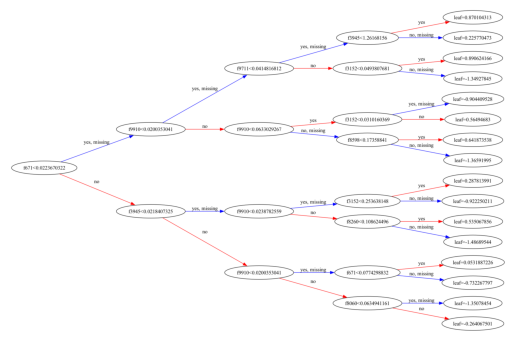

In [129]:
from xgboost import plot_tree
import graphviz

# Vẽ cây đầu tiên (index 0)
plot_tree(rf_classifier, num_trees=0, rankdir='LR')
plt.show()

In [130]:
# Xuất cây dưới dạng file .dot
dot_data = xgb.to_graphviz(rf_classifier, num_trees=0, rankdir='LR')

# Lưu file .dot
#dot_data.save('tree.dot')

# Nếu muốn xuất trực tiếp thành file ảnh PNG
dot_data.render('tree', format='png')

'tree.png'